In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

# Load the data
cafe = pd.read_csv("cleaned_cafe_sales.csv")

## Assesing Data

###Data Assessment – Visual *review*

In [2]:
# Viewing the first few rows of the dataset
cafe.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [3]:
# Viweing random rows for more deep assesment
cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
5448,TXN_2761003,Smoothie,2.0,4.0,8.0,Unknown,In-store,2023-11-08
4225,TXN_5380198,Cake,3.0,3.0,9.0,Unknown,Unknown,Unknown
9947,TXN_5921442,Smoothie,4.0,4.0,16.0,Cash,Takeaway,2023-02-04
8842,TXN_4692681,Tea,2.0,1.5,3.0,Unknown,Unknown,2023-06-02
3488,TXN_4209748,Cookie,2.0,1.0,2.0,Digital Wallet,Takeaway,2023-10-24
4237,TXN_8937461,Cookie,5.0,1.0,5.0,Digital Wallet,Unknown,2023-12-22
8661,TXN_7589318,Cake,4.0,3.0,12.0,Cash,In-store,2023-09-21
1576,TXN_4532651,Coffee,2.0,2.0,4.0,Unknown,In-store,2023-09-13
3858,TXN_8794205,Cake,4.0,3.0,12.0,Credit Card,Takeaway,2023-10-22
4412,TXN_1769882,Cake/Juice,3.0,3.0,9.0,Unknown,Takeaway,2023-03-17


In [4]:
# Viewing the last few rows of the dataset
cafe.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Unknown,Unknown,2023-08-30
9996,TXN_9659401,Cookie,3.0,1.0,3.0,Digital Wallet,Unknown,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,Unknown,2023-12-02
9999,TXN_6170729,Sandwich,3.0,4.0,12.0,Cash,In-store,2023-11-07


###Data Assessment – Programmatic checks

In [5]:
# Viewing infos about the data columns
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9994 non-null   object 
 2   Quantity          9962 non-null   float64
 3   Price Per Unit    9962 non-null   float64
 4   Total Spent       9960 non-null   float64
 5   Payment Method    10000 non-null  object 
 6   Location          10000 non-null  object 
 7   Transaction Date  10000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


There are a some missing values but not in huge numbers and one wrong dataset type which is the transaction date it is supposed to be datatime.

In [6]:
# Determining the sum of missing values.
print("Sum of missing values in each column",cafe.isnull().sum())

Sum of missing values in each column Transaction ID       0
Item                 6
Quantity            38
Price Per Unit      38
Total Spent         40
Payment Method       0
Location             0
Transaction Date     0
dtype: int64


As expected missing values in three datasets.

In [7]:
# Checking for duplicates
print("Sum of duplicated rows:", cafe.duplicated().sum())

Sum of duplicated rows: 0


No duplicated rows.

In [8]:
# Checking for data acuracy
cafe.describe()

,Quantity,Price Per Unit,Total Spent
count,9962.000000,9962.000000,9960.000000
mean,3.025597,2.947902,8.930924
std,1.420181,1.279759,6.004475
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


The dataset looks quite accurate.

###  Data Cleaning

In [9]:
# Drop rows where any of these columns have null values
cafe = cafe.dropna(subset=['Item', 'Quantity', 'Price Per Unit', 'Total Spent'])

# Test that it worked
print(cafe.isnull().sum())

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [10]:
# Handling the incorrect datatypes.
cafe['Transaction Date'] = pd.to_datetime(cafe['Transaction Date'], errors='coerce')
# Preping the data
cafe['Month'] = cafe['Transaction Date'].dt.month
cafe['Day'] = cafe['Transaction Date'].dt.day
cafe['Day_Name'] = cafe['Transaction Date'].dt.day_name()
cafe['Hour'] = cafe['Transaction Date'].dt.hour
cafe['Item'] = cafe['Item'].str.replace('/', ' & ')

# Checking that the types have been changed
cafe.dtypes

,0
Transaction ID,object
Item,object
Quantity,float64
Price Per Unit,float64
Total Spent,float64
Payment Method,object
Location,object
Transaction Date,datetime64[ns]
Month,float64
Day,float64


## Exploratory Data Analysis

In [11]:
# Top selling items
top_items = cafe.groupby('Item')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 items by quantity sold:")
print(top_items)


Top 10 items by quantity sold:
Item
Coffee                 3897.0
Salad                  3813.0
Tea                    3629.0
Cookie                 3585.0
Juice                  3503.0
Cake                   3459.0
Sandwich               3411.0
Smoothie               3324.0
Cake & Juice            757.0
Sandwich & Smoothie     704.0
Name: Quantity, dtype: float64


In [12]:
# Revenue by item
revenue_by_item = cafe.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 items by revenue:")
print(revenue_by_item)


Top 10 items by revenue:
Item
Salad                  19065.0
Sandwich               13644.0
Smoothie               13296.0
Juice                  10509.0
Cake                   10377.0
Coffee                  7794.0
Tea                     5443.5
Cookie                  3585.0
Sandwich & Smoothie     2816.0
Cake & Juice            2271.0
Name: Total Spent, dtype: float64


### Visualization

Text(0.5, 1.0, 'Distribution of Item Prices')

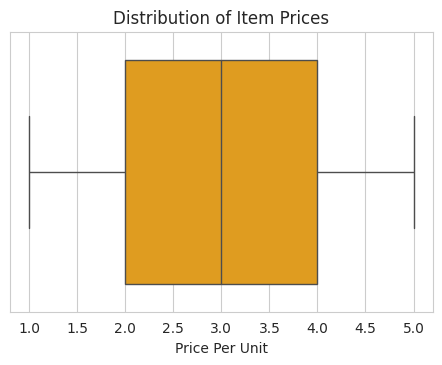

In [13]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Item Price Distribution
plt.subplot(2, 2, 3)
sns.boxplot(x='Price Per Unit', data=cafe, color='orange')
plt.title('Distribution of Item Prices')

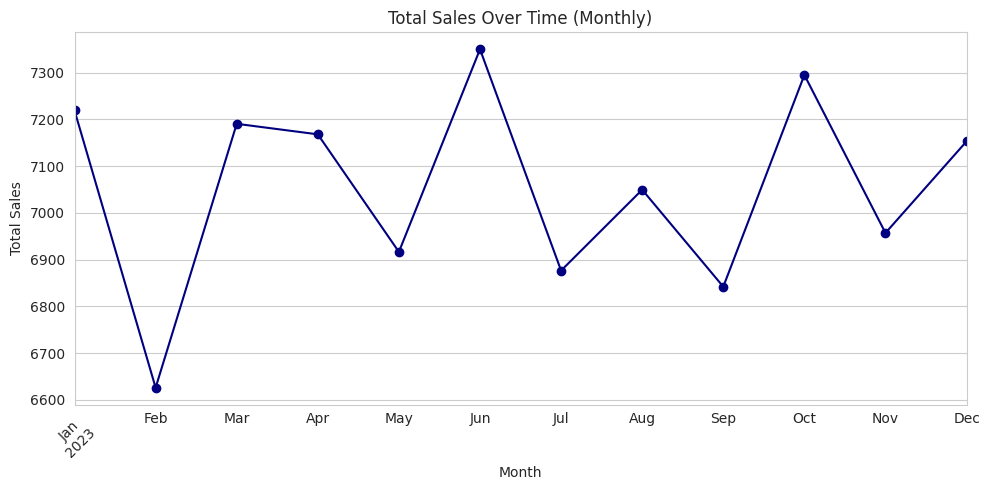

In [14]:
# Sales over time (monthly trend)
sales_over_time = cafe.groupby(cafe["Transaction Date"].dt.to_period("M"))["Total Spent"].sum()

plt.figure(figsize=(10,5))
sales_over_time.plot(kind="line", marker="o", color="navy")
plt.title("Total Sales Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


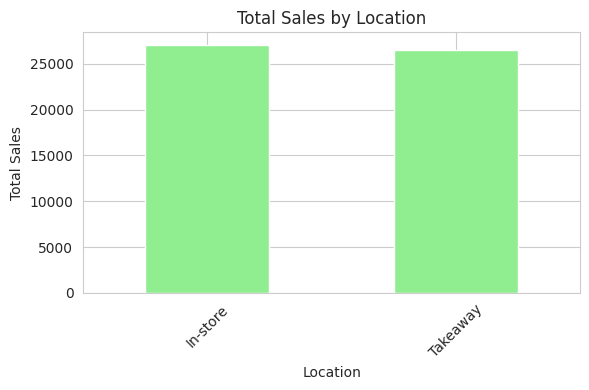

In [18]:
#  Sales by location
sales_by_location = cafe[cafe["Location"] != "Unknown"].groupby("Location")["Total Spent"].sum()

plt.figure(figsize=(6,4))
sales_by_location.plot(kind="bar", color="lightgreen")
plt.title("Total Sales by Location")
plt.ylabel("Total Sales")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

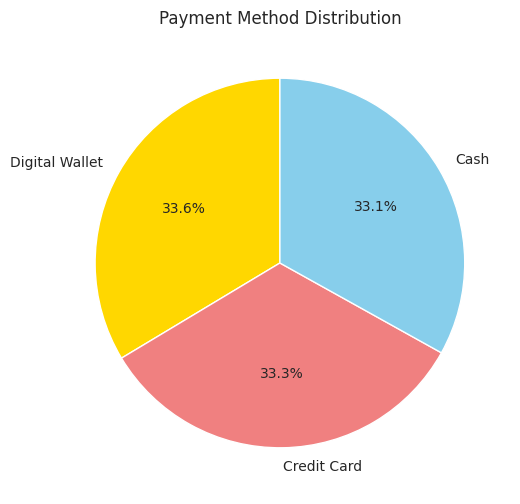

In [21]:
# Payment method distribution
payment_counts = cafe[cafe["Payment Method"] != "Unknown"]["Payment Method"].value_counts()

plt.figure(figsize=(6,6))
payment_counts.plot(kind="pie",autopct="%1.1f%%",startangle=90,colors=["gold","lightcoral","skyblue","lightgreen"])
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

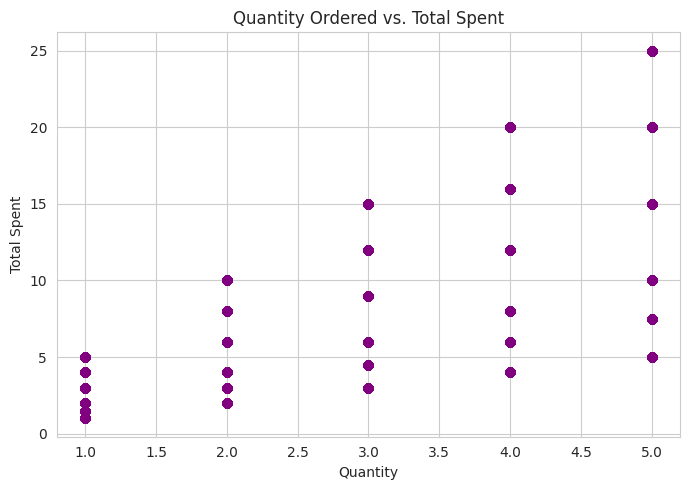

In [23]:
# Quantity vs. Total Spent scatterplot
plt.figure(figsize=(7,5))
plt.scatter(cafe["Quantity"], cafe["Total Spent"], alpha=0.5, color="purple")
plt.title("Quantity Ordered vs. Total Spent")
plt.xlabel("Quantity")
plt.ylabel("Total Spent")
plt.tight_layout()
plt.show()